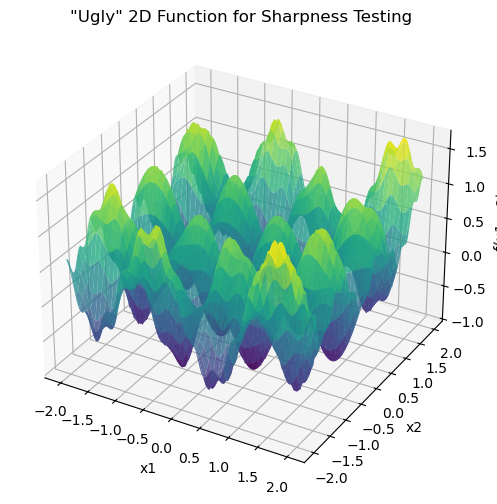

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def ugly_function(x1, x2):
    return np.sin(3*x1) * np.cos(5*x2) + 0.1*(x1**2 + x2**2) + 0.1*np.sin(10*x1*x2)

# Grid
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = ugly_function(X1, X2)

# 3D Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('2D Function for Sharpness/Flatness Testing')
plt.show()

In [11]:
def compute_hessian_eigenvalues(f, x, epsilon=1e-3, power_iterations=10):
    """
    Compute all eigenvalues of the Hessian of a 2D function f at point x = [x1, x2].
    Uses the power method for iterative refinement.
    Returns eigenvalues sorted by magnitude (largest first).
    """
    x = np.array(x, dtype=float)
    hessian = np.zeros((2, 2))
    
    # Finite differences to compute Hessian entries
    for i in range(2):
        for j in range(2):
            # Basis vectors
            ei = np.zeros(2)
            ej = np.zeros(2)
            ei[i] = 1
            ej[j] = 1
            
            # Central difference for ∂²f/∂xi∂xj
            f_pp = f(*(x + epsilon * (ei + ej)))
            f_pm = f(*(x + epsilon * (ei - ej)))
            f_mp = f(*(x + epsilon * (-ei + ej)))
            f_mm = f(*(x + epsilon * (-ei - ej)))
            
            hessian[i, j] = (f_pp - f_pm - f_mp + f_mm) / (4 * epsilon**2)
    
    # Symmetrize to handle numerical errors
    hessian = 0.5 * (hessian + hessian.T)
    
    # Compute eigenvalues using the power method (for demonstration)
    def power_method(A, iterations):
        """Power method to estimate the largest eigenvalue and eigenvector."""
        v = np.random.rand(A.shape[0])
        v /= np.linalg.norm(v)
        for _ in range(iterations):
            Av = A @ v
            v = Av / np.linalg.norm(Av)
        eigenvalue = v.T @ A @ v
        return eigenvalue, v
    
    # Estimate largest eigenvalue
    lambda1, v1 = power_method(hessian, power_iterations)
    
    # Estimate second eigenvalue (for 2x2 matrix)
    # Subtract the contribution of the first eigenpair
    A_deflated = hessian - lambda1 * np.outer(v1, v1)
    lambda2, v2 = power_method(A_deflated, power_iterations)
    
    # Return eigenvalues sorted by magnitude
    eigenvalues = [lambda1, lambda2]
    return sorted(eigenvalues, key=abs, reverse=True)

In [ ]:
# Test points
points = [
    (0.0, 0.0),    # Flat minimum
    (1.5, 1.5),    # Sharp minimum
    (0.5, -0.5)    # Saddle point
]

for x in points:
    eigenvalues = compute_hessian_eigenvalues(ugly_function, x)
    print(f"Eigenvalues at {x}: {eigenvalues}")

Eigenvalues at (0.0, 0.0): [np.float64(1.1999867805334894), np.float64(-0.8000198281203093)]
Eigenvalues at (1.5, 1.5): [np.float64(30.252824145420714), np.float64(3.589084752064072)]
Eigenvalues at (0.5, -0.5): [np.float64(21.88699470728538), np.float64(8.67580228064919)]


In [13]:
def measure_flatness_2d(f, x, radius=0.1, num_samples=5):
    """
    Measure flatness of a 2D function f at point x = [x1, x2].
    Returns the maximum loss change within a neighborhood of given radius.
    """
    x = np.array(x, dtype=float)
    original_loss = f(*x)
    max_diff = 0
    
    for _ in range(num_samples):
        # Random perturbation direction (normalized)
        perturbation = np.random.randn(2)
        perturbation = (perturbation / np.linalg.norm(perturbation)) * radius
        
        # Perturbed point
        x_perturbed = x + perturbation
        
        # Compute perturbed loss
        perturbed_loss = f(*x_perturbed)
        max_diff = max(max_diff, abs(perturbed_loss - original_loss))
    
    return max_diff

In [14]:
# Test points
points = [
    (0.0, 0.0),    # Flat minimum
    (1.5, 1.5),    # Sharp minimum
    (0.5, -0.5)    # Saddle point
]

for x in points:
    max_diff = measure_flatness_2d(ugly_function, x)
    print(f"Max flatness difference at {x}: {max_diff:.4f}")

Max flatness difference at (0.0, 0.0): 0.2788
Max flatness difference at (1.5, 1.5): 0.4722
Max flatness difference at (0.5, -0.5): 0.3193


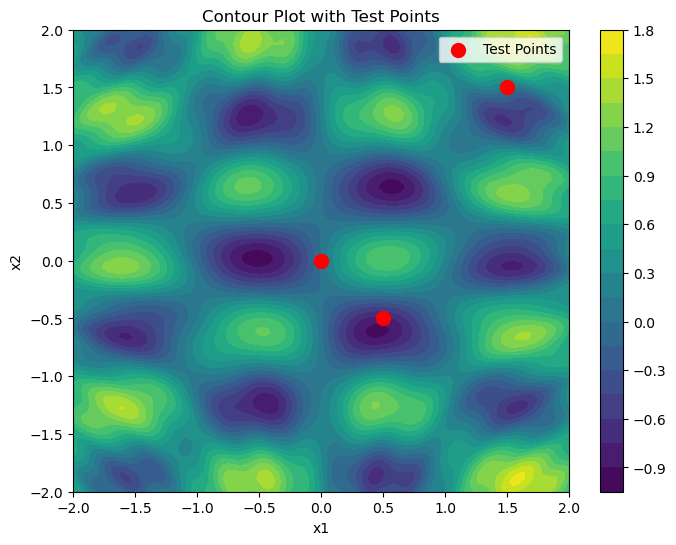

In [8]:
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, Z, levels=20, cmap='viridis')
plt.colorbar()
plt.scatter(*zip(*points), c='red', s=100, label='Test Points')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour Plot with Test Points')
plt.legend()
plt.show()